replicate https://leap-stc.github.io/ClimSim/evaluation/main_figure_generation.html


https://github.com/leap-stc/ClimSim/blob/main/preprocessing/create_npy_data_splits.ipynb

### Generate Predictions using Trained Models

In [1]:
import torch
import numpy as np
import os
import xarray as xr
import matplotlib.pyplot as plt
import gcsfs
fs = gcsfs.GCSFileSystem()

In [2]:
# to test
user_path = "gs://leap-scratch/sammyagrawal"
with fs.open(os.path.join(user_path, "input_climsim.npy"), 'rb') as f:
    x_npy = np.load(f)
with fs.open(os.path.join(user_path, "output_climsim.npy"), 'rb') as f:
    y_npy = np.load(f)

In [3]:
x_npy.shape, y_npy.shape

((1121280, 124), (1121280, 128))

In [12]:
n_samples = 384*30
x_test, y_test = x_npy[:n_samples], y_npy[:n_samples]

In [16]:
y_pred1 = y_test + 0.001*np.random.randn(n_samples,128)
y_pred2 = y_pred1 + 0.4*np.random.randn(n_samples,128)

In [18]:
x_test.shape, y_test.shape, y_pred1.shape

((11520, 124), (11520, 128), (11520, 128))

### Comparing norms to saved

In [78]:
from climsim_data_utils import data_utils, load_vars

In [79]:
mapper = fs.get_mapper("gs://leap-persistent-ro/sungdukyu/E3SM-MMF_ne4.grid-info.zarr")
grid_info = xr.open_dataset(mapper, engine='zarr')

dutils = data_utils(grid_info=grid_info)

In [81]:
def reconstruct_np(X_norm, Y_norm, data_vars='v1'):
    inputs, outputs = load_vars(data_vars)
    input_mean = xr.open_dataset('Climsim_info/input_mean.nc')[inputs].to_stacked_array('mlvar', sample_dims='').values
    input_max = xr.open_dataset('Climsim_info/input_max.nc')[inputs].to_stacked_array('mlvar', sample_dims='').values
    input_min = xr.open_dataset('Climsim_info/input_min.nc')[inputs].to_stacked_array('mlvar', sample_dims='').values
    output_scale = xr.open_dataset('Climsim_info/output_scale.nc')[inputs].to_stacked_array('mlvar', sample_dims='').values

    X = X_norm*(input_max - input_min) + input_mean
    Y = Y_norm / output_scale
    return(X,Y)

In [59]:
x_avg = x_npy.mean(axis=0)
x_avg.shape

(124,)

In [60]:
x_norm = xr.open_dataset("Climsim_info/input_mean.nc")

In [64]:
x_norm_v1 = x_norm[dutils.v1_inputs].to_stacked_array('mlvar', sample_dims='').values

In [75]:
(x_avg -x_norm_v1)

array([-2.56817731e-02,  4.18193672e-02,  9.98839433e-03,  6.54797630e-05,
        2.16402490e-03, -2.84236218e-03, -7.80040626e-03, -7.79458220e-04,
        6.23871345e-03,  5.40563035e-03,  2.17198329e-03,  3.37880128e-04,
       -5.97191006e-04, -9.69804839e-04,  5.85265309e-04,  1.21450536e-03,
       -3.11999986e-03, -3.44376894e-03,  5.46327227e-03,  7.97039341e-03,
        6.71671362e-03,  5.06742930e-03,  2.17408058e-03, -1.35648329e-03,
       -4.15770949e-03, -6.98711656e-03, -9.16070289e-03, -1.06326176e-02,
       -1.12655234e-02, -1.12312231e-02, -1.09699861e-02, -1.07240824e-02,
       -1.05749213e-02, -1.01690826e-02, -9.24284257e-03, -7.57338261e-03,
       -5.09230842e-03, -2.87782532e-03, -1.14609395e-03,  4.11092162e-04,
        1.60435950e-03,  2.65040335e-03,  3.15641661e-03,  3.28444663e-03,
        3.01585356e-03,  2.99826758e-03,  4.39359316e-03,  7.46977212e-03,
        1.22814718e-02,  1.88928090e-02,  2.60559371e-02,  3.35944514e-02,
        4.12411248e-02,  

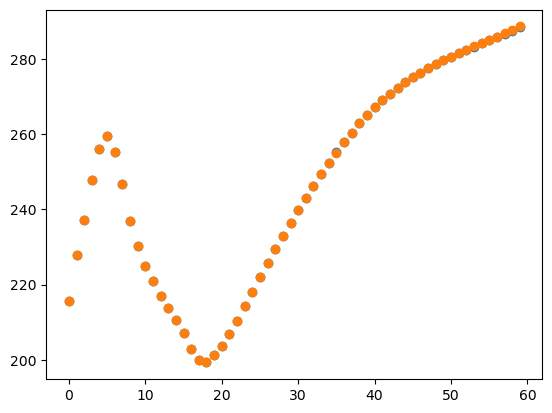

In [69]:
plt.scatter(np.arange(60), x_norm_v1[:60])
plt.scatter(np.arange(60), x_avg[:60])

In [45]:
output_scaling = xr.open_dataset("Climsim_info/output_scale.nc")

oscaling  = output_scaling[dutils.v1_outputs].to_stacked_array('mlvar', sample_dims='').values

In [52]:
y_avg = y_npy.mean(axis=0)
y_scale_test = 1./ y_avg

/tmp/ipykernel_626/3185387537.py:2: RuntimeWarning: divide by zero encountered in divide
  y_scale_test = 1./ y_avg


In [54]:
y_avg

array([ 1.19014050e-05, -1.13608688e-05, -5.22001272e-06, -1.83795208e-06,
       -1.83506310e-06,  7.04202705e-07,  1.36045056e-06,  8.66873477e-07,
        1.65614915e-08, -9.96006355e-08,  3.42032446e-07,  5.19593379e-07,
        6.27532105e-07,  6.53872793e-07,  7.57789509e-07,  1.05315910e-06,
        1.64673863e-06,  1.35920795e-06,  6.38992441e-07, -5.41416933e-07,
       -6.43335666e-09, -2.26299367e-06, -3.69347862e-06, -5.13319715e-06,
       -6.32380659e-06, -6.27994870e-06, -5.32568580e-06, -4.25518677e-06,
       -3.33941632e-06, -2.52159343e-06, -1.73624515e-06, -1.34164169e-06,
       -6.12715034e-07,  1.00480138e-07,  6.40130091e-07,  8.57316853e-07,
        1.44235977e-06,  1.70224506e-06,  1.48805081e-06,  1.39098697e-06,
        1.65367745e-06,  2.02146425e-06,  1.71443179e-06,  1.11403501e-06,
        1.36902466e-06,  1.54391288e-06,  2.10816170e-06,  3.53536307e-06,
        4.23332185e-06,  5.19102267e-06,  4.95795627e-06,  6.65066905e-06,
        7.07406187e-06,  

In [53]:
y_scale_test

array([ 8.40236928e+04, -8.80214374e+04, -1.91570414e+05, -5.44083826e+05,
       -5.44940390e+05,  1.42004567e+06,  7.35050598e+05,  1.15357088e+06,
        6.03810352e+07, -1.00400966e+07,  2.92369923e+06,  1.92458187e+06,
        1.59354397e+06,  1.52934945e+06,  1.31962767e+06,  9.49524147e+05,
        6.07260911e+05,  7.35722592e+05,  1.56496374e+06, -1.84700540e+06,
       -1.55439851e+08, -4.41892530e+05, -2.70747472e+05, -1.94810363e+05,
       -1.58132604e+05, -1.59236969e+05, -1.87769245e+05, -2.35007311e+05,
       -2.99453528e+05, -3.96574637e+05, -5.75955532e+05, -7.45355490e+05,
       -1.63208008e+06,  9.95221566e+06,  1.56218246e+06,  1.16642989e+06,
        6.93308299e+05,  5.87459482e+05,  6.72020063e+05,  7.18913996e+05,
        6.04712847e+05,  4.94690916e+05,  5.83283632e+05,  8.97637854e+05,
        7.30447030e+05,  6.47704940e+05,  4.74346915e+05,  2.82856380e+05,
        2.36221113e+05,  1.92640268e+05,  2.01696010e+05,  1.50360812e+05,
        1.41361500e+05,  

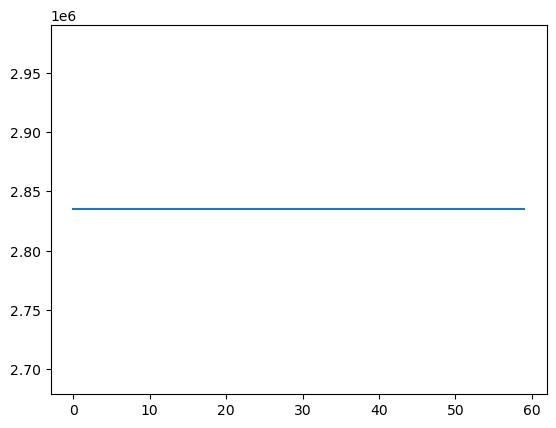

In [56]:
plt.plot(np.arange(60), oscaling[60:120])
#plt.plot(np.arange(60), y_scale_test[60:120])

In [33]:
oscaling.values()

ValuesView(<xarray.Dataset> Size: 1kB
Dimensions:         (lev: 60)
Dimensions without coordinates: lev
Data variables:
    ptend_t         (lev) float64 480B ...
    ptend_q0001     (lev) float64 480B ...
    cam_out_NETSW   float64 8B ...
    cam_out_FLWDS   float64 8B ...
    cam_out_PRECSC  float64 8B ...
    cam_out_PRECC   float64 8B ...
    cam_out_SOLS    float64 8B ...
    cam_out_SOLL    float64 8B ...
    cam_out_SOLSD   float64 8B ...
    cam_out_SOLLD   float64 8B ...)

## Evaluating

In [19]:
from climsim_data_utils import data_utils, load_vars, setup_data_utils
from climsim_data_utils import *

In [21]:
def setup_data_utils(ds_type='aquaplanet', data_source='gcsfs', data_vars='v1', **kwargs):
    # data source is either a google cloud bucket, local file path, or tries to load directly from Huggingface
    ds_type = expand_ds_name(ds_type)
    if('grid_info' in kwargs):
        grid_info = kwargs['grid_info']
    else:
        grid_url = f"https://huggingface.co/datasets/LEAP/{ds_type}/resolve/main/{ds_type}_grid-info.nc"
        grid_info = read_url_xarray(grid_url)
        
    data = data_utils(data_source, ds_type, grid_info.compute())
    if(data_source == 'hf'):
        data.data_path = f"https://huggingface.co/datasets/LEAP/{ds_type}/resolve/main/train/"
    elif(data_source == 'local' or data_source == "gcsfs"):
        #assert 'base_dir' in kwargs, "Need to provide base path via base_dir arg"
        if("base_dir" in kwargs):
            data.data_path = kwargs[base_dir]
    else:
        print("Invalid data source, must be hf, local, or gcsfs")
    if(data_vars == 'v1'):
        data.set_to_v1_vars()
    elif(data_vars == 'v2'):
        data.set_to_v2_vars()


    input_mean = xr.open_dataset('Climsim_info/input_mean.nc')
    input_max = xr.open_dataset('Climsim_info/input_max.nc')
    input_min = xr.open_dataset('Climsim_info/input_min.nc')
    output_scale = xr.open_dataset('Climsim_info/output_scale.nc')
    data.set_norm_info(input_mean, input_max, input_min, output_scale)
            
    
    return(data)

In [22]:
mapper = fs.get_mapper("gs://leap-persistent-ro/sungdukyu/E3SM-MMF_ne4.grid-info.zarr")
grid_info = xr.open_dataset(mapper, engine='zarr')

dutils = setup_data_utils(grid_info=grid_info, data_vars='v1')

In [23]:
dutils.input_scoring is None

True

Inspired by [Climsim guide](https://leap-stc.github.io/ClimSim/evaluation/main_figure_generation.html)

In [24]:
# set variables to V1 subset
dutils.set_to_v1_vars()

dutils.input_scoring = x_test
dutils.target_scoring = y_test
# set pressure weights
dutils.set_pressure_grid(data_split = 'scoring')

# load model predictions
dutils.model_names = ['fake_model', 'fake_model_2']
predictions = {
    'fake_model' : y_pred1, 
    'fake_model_2' : y_pred2
}

dutils.preds_scoring = predictions


1. Undo output scaling
2. Weight vertical levels by dp/g
3. Weight horizontal area of each grid cell by a[x]/mean(a[x])
4. Convert units to a common energy unit

In [25]:
dutils.reweight_target(data_split = 'scoring')
dutils.reweight_preds(data_split = 'scoring')

dutils.metrics_names = ['MAE', 'RMSE', 'R2']
dutils.create_metrics_df(data_split = 'scoring')

/home/jovyan/Samarth/2024/climsim_data_utils.py:1267: RuntimeWarning: divide by zero encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time
/home/jovyan/Samarth/2024/climsim_data_utils.py:1267: RuntimeWarning: divide by zero encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time


In [26]:
dutils.model_names

['fake_model', 'fake_model_2']

In [27]:
dutils.metrics_var_scoring['fake_model']

,MAE,RMSE,R2
variable,,,
ptend_t,0.133498,0.165918,0.87188
ptend_q0001,0.117729,0.146369,-inf
cam_out_NETSW,0.334654,0.41666,-inf
cam_out_FLWDS,0.160149,0.199164,0.999664
cam_out_PRECSC,0.161144,0.200279,-inf
cam_out_PRECC,1.51049,1.877517,-inf
cam_out_SOLS,0.158699,0.197494,-inf
cam_out_SOLL,0.171769,0.214642,-inf
cam_out_SOLSD,0.130798,0.162638,-inf


In [31]:
dutils.metrics_var_scoring['fake_model_2']

,MAE,RMSE,R2
variable,,,
ptend_t,53.524392,66.504104,-20675.23643
ptend_q0001,47.195209,58.636937,-inf
cam_out_NETSW,133.711817,165.237406,-inf
cam_out_FLWDS,62.48986,77.847823,-48.521115
cam_out_PRECSC,64.595863,80.611717,-inf
cam_out_PRECC,615.071302,760.312131,-inf
cam_out_SOLS,63.500213,79.138954,-inf
cam_out_SOLL,68.836698,85.51523,-inf
cam_out_SOLSD,52.464927,65.637407,-inf


In [28]:
dutils.metrics_idx_scoring['fake_model']

,MAE,RMSE,R2
output_idx,,,
0,0.000367,0.000456,0.96964
1,0.000656,0.000818,0.995107
2,0.001162,0.001447,0.986604
3,0.002043,0.002541,0.975119
4,0.003476,0.004299,0.967756
...,...,...,...
123,1.51049,1.877517,-inf
124,0.158699,0.197494,-inf
125,0.171769,0.214642,-inf
